# KAGGLE 주택가격 데이터 불러오기

House Prices - Advanced Regression Techniques

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

- 81개의 컬럼, 79개의 변수로 구성된 데이터
- 미국 아이오와 주의 에임스(Ames) 지방의 주택가격 정보를 가지고 있음
- target 데이터는 'SalesPrice' 컬럼

### 데이터 불러오기

In [121]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

house_df_org = pd.read_csv('house_price.csv')
house_df_org.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
house_df = house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [123]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [124]:
# 데이터 세트 shape
print('데이터세트의 shape: ', house_df.shape)

# 데이터 피처의 데이터타입 구하기
print('\n전체 피처의 type: \n', house_df.dtypes.value_counts())

# 각 피처별 null값 개수
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수: \n', isnull_series[isnull_series > 0].sort_values(ascending = False))

데이터세트의 shape:  (1460, 81)

전체 피처의 type: 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수: 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### Target 데이터의 분포도 확인

#### 기존 분포도

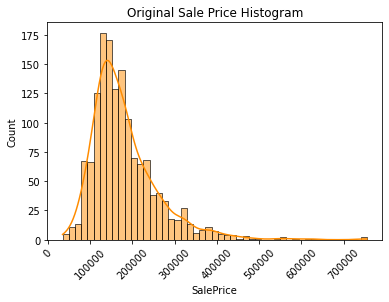

In [125]:
# target 데이터인 saleprice 분포가 정규분포를 이루는지 확인
import matplotlib.pyplot as plt
import seaborn as sns

y_target = house_df['SalePrice']

plt.title('Original Sale Price Histogram')
plt.xticks(rotation = 45)
sns.histplot(y_target, kde = True, color = 'darkorange')
plt.show()

#### 로그변환후 분포도

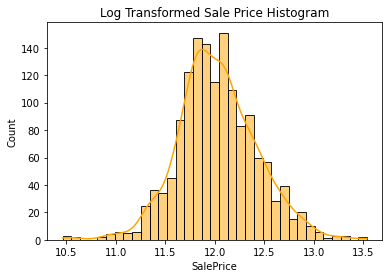

In [126]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(y_target)

sns.histplot(log_SalePrice, kde = True, color = 'orange')
plt.show()

- 정규 분포 형태로 결괏값이 분포함
- 따라서, SalePrice를 로그 변환한 뒤 데이터프레임에 반영하도록 함

In [127]:
original_SalesPrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


### 데이터전처리

In [128]:
# 각 피처별 null값 개수
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수: \n', isnull_series[isnull_series > 0].sort_values(ascending = False))


Null 칼럼과 그 건수: 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


- null값이 1000개가 넘어가는 피처가 4개, 그 외에도 FireplaceQu 피처 역시 null값이 많아 삭제해야 함

#### 불필요한 컬럼 삭제

In [129]:
# 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True)

#### 숫자형데이터의 null값 대체: 컬럼별 평균값

In [130]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### LotFrontage컬럼의 null값 확인

In [131]:
house_df[house_df['LotFrontage'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,12.206078
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,11.877576
14,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,176,0,0,0,0,5,2008,WD,Normal,11.964007
16,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,11.911708
24,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,99,0,0,0,0,4,2007,WD,Normal,12.116700
1431,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,11.875838
1441,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,11.913720
1443,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,40,0,0,5,2009,WD,Normal,11.703554


##### LotFrontage컬럼의 null값 확인

In [132]:
house_df['LotFrontage'].mean()

70.04995836802665

In [133]:
# 드롭하지 않은 숫자형 null값은 컬럼의 평균값으로 대체함

house_df.fillna(house_df.mean(), inplace = True)

In [134]:
house_df.loc[7]['LotFrontage']

70.04995836802665

- 각 컬럼의 평균값으로 대체된 것을 확인할 수 있음

##### 확인: null값이 잇는 피처명과 타입 추출

In [135]:
# null값이 있는 피처명과 타입 추출

null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]

print('## Null 피처의 Type: \n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


#### 문자형 데이터의 null값 대체:원핫인코딩

#### 과제 2 : 문자형 피처는 모두 원핫인코딩으로 변환 수행 후 선형회귀모델을 적용하여 학습/예측/평가

In [136]:
print('get_dummies() 수행 전 데이터 shape: ', house_df.shape)

# 원핫인코딩
house_df_ohe = pd.get_dummies(house_df)

print('get_dummies() 수행 후 데이터 sahpe: ', house_df_ohe.shape)


null_columns_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null피처의 Type: \n', house_df_ohe.dtypes[null_columns_count.index])

get_dummies() 수행 전 데이터 shape:  (1460, 75)
get_dummies() 수행 후 데이터 sahpe:  (1460, 271)
## Null피처의 Type: 
 Series([], dtype: object)


- 원핫 인코딩 후 피처가 75개->272개로 증가함
- null값을 가진 column은 존재하지 않음

## 선형회귀 모델 학습/예측/평가

- 실제 target 값을 로그변환해주었기 때문에, 예측값 역시 로그변환된 형태로 나올 것
- 이렇게 로그변환된 실제 target값과 예측값에 대해 RMSE를 구하면 이는 RMSLE 값이 됨

### 선형회귀모델별 평가지표 사용자함수 생성

In [137]:
# 예측 성능 평가지표인 RMSE를 측정하는 사용자함수 생성

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    print(f'{model.__class__.__name__}, 로그 변환된 RMSE(RMSLE): {round(rmse, 3)}')
    return rmse
    

In [138]:
# 여러모델의 예측 성능 평가지표 측정하는 사용자함수 생성

def get_rmses(model):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### 사용자함수를 이용한 학습/예측/평가

In [139]:
# 선형회귀모델 학습/예측/평가

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1)

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2,
                                                    random_state = 155)

# LinearRegression, Ridge, Lasso 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

rg_reg = Ridge()
rg_reg.fit(X_train, y_train)

ls_reg = Lasso()
ls_reg.fit(X_train, y_train)


# 예측 및 평가
models = [lr_reg, rg_reg, ls_reg]
get_rmses(models)

LinearRegression, 로그 변환된 RMSE(RMSLE): 0.238
Ridge, 로그 변환된 RMSE(RMSLE): 0.207
Lasso, 로그 변환된 RMSE(RMSLE): 0.267


[0.23780153501627224, 0.20723434323052384, 0.26704497698896396]

- 라쏘 회귀의 경우, 회귀 성능이 타 회귀방식보다 떨어지게 나옴
- 라쏘의 경우 최적의 하이퍼파라미터 튜닝이 필요해 보임

### 각 모델의 피처별 회귀 계수 시각화
피처별 회귀 계수 시각화하여 모델별 어떤 회귀계수로 구성되는지 확인해보기

In [140]:
## 모델별 상위/하위 10개의 회귀계수를 반환하는 사용자함수 생성

def get_top_bottom_coef(model, n = 10):
    # coef_ 속성을 기반으로 시리즈 객체 생성, 인덱스는 컬럼명
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    # 상위 10개, 하위 10개의 회귀 계수 추출 및 반환
    coef_high = coef.sort_values(ascending = False).head(n)
    coef_low = coef.sort_values(ascending = False).tail(n)
    
    return coef_high, coef_low

글꼴 크기 설정
참고: https://www.delftstack.com/ko/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/

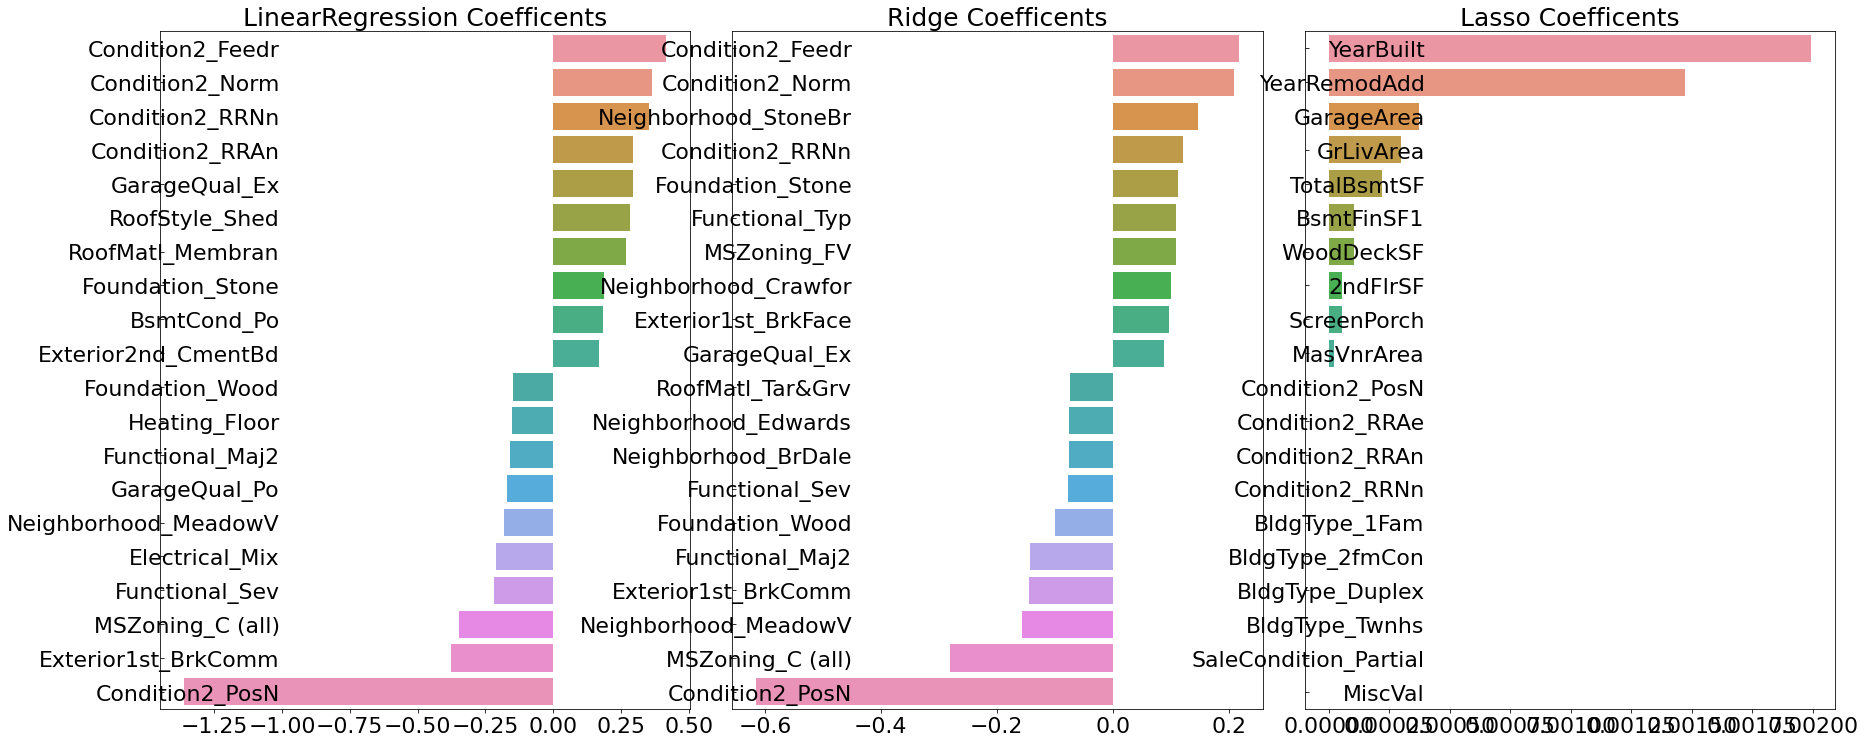

In [141]:
# 시각화
## 시각화를 위한 사용자함수 생성
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols = 3)
    fig.tight_layout()   # axes 사이 간격을 적절하게 조정
    
    #입력인자로 받은 list 객체인 models에서 차례로 model을 ㅊ출해 회귀 계수 시각화
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        # ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font크기 조정
        axs[i_num].set_title(model.__class__.__name__ + ' Coefficents', size = 25)
        axs[i_num].tick_params(axis = "y", direction = "in", pad = -120)  
                                    # y축 틱을 안쪽으로 들어가게 설정하고, 틱과 레이블 거리를 -120으로
        
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
                                # 눈금의 글꼴크기 설정
        sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])
        
        
models = [lr_reg, rg_reg, ls_reg]
visualize_coefficient(models)

- 모델별 회귀계수를 보면 OLS 기반의 LinearRegression과 Ridge의 경우 회귀 계수가 유사한 형태로 분포되어 있음
- 하지만, Lasso의 경우, 전체적으로 회귀 계수 크기가 작고 그 중에 YearBuilt가 가장 크고, 다른 피처 회귀계수는 너무 작음
- 라쏘의 경우 다른 두 개 모델과 다른 회귀계수 형태를 보임

#### 교차 검증 세트로 학습/예측/평가

In [142]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        neg_mean_squared_error = cross_val_score(model, X_features, y_target,
                                                 scoring = 'neg_mean_squared_error',
                                                 cv = 5)
        rmse_list = np.sqrt(-1 * neg_mean_squared_error)
        rmse_avg = np.round(np.mean(rmse_list),3)
        
        print(f'\n{model.__class__.__name__} CV RMSE 값 리스트: {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} CV 평균 RMSE 값: {np.round(rmse_avg,3)}')
        
# 앞 예제에서 학습한 릿지, 라쏘 모델의 CV RMSE값 출력
models = [rg_reg, ls_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


- 5개 폴드 세트로 학습한 후 평가해도 여전히 라쏘의 경우 릿지보다 성능이 떨어짐
- 릿지, 라쏘모델에 alpha 하이퍼파라미터를 변화시키면서 최적값 도출해보자.

In [143]:
from sklearn.model_selection import GridSearchCV

# gridsearchcv를 통해 최적의 하이퍼파라미터를 찾고, rmse값을 구하는 사용자함수 생성
def print_best_params(model, params):
    # 5개의 교차검증 및 최소오차제곱을 찾는 최적의 하이퍼파라미터 구하는 모델 객체 생성
    grid_model = GridSearchCV(model, param_grid = params,
                              scoring = 'neg_mean_squared_error',
                              cv = 5)
    
    # 학습
    grid_model.fit(X_features, y_target)
    
    # 최적 하이퍼파라미터의 rmse 계산
    rmse = np.sqrt(-1 * grid_model.best_score_)

    print(f'{model.__class__.__name__} 5 CV시 최적 평균 RMSE 값: {rmse:.3f}, 최적의 alpha값: {grid_model.best_params_}')
   

# 릿지, 라쏘 하이퍼 파라미터
rg_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
ls_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

# 함수 대입
print_best_params(rg_reg, rg_params)
print_best_params(ls_reg, ls_params)

Ridge 5 CV시 최적 평균 RMSE 값: 0.142, 최적의 alpha값: {'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE 값: 0.142, 최적의 alpha값: {'alpha': 0.001}


- 릿지 모델의 경우 alpha가 12에서 최적 평균 RMSE값이 0.142, 라쏘모델의 경우 alpha가 0.001에서 최적 평균 RMSE가 0.142로 나옴
- 라쏘의 경우 alpha값 최적화 이후 예측 성능이 많이 좋아짐


#### 선형 모델에 최적 alpha값을 설정한 후, train_test_split()으로 분할된 학습 데이터와 테스트 데이터를 이용해 모델의 학습/예측/평가를 수행


LinearRegression, 로그 변환된 RMSE(RMSLE): 0.238
Ridge, 로그 변환된 RMSE(RMSLE): 0.195
Lasso, 로그 변환된 RMSE(RMSLE): 0.199


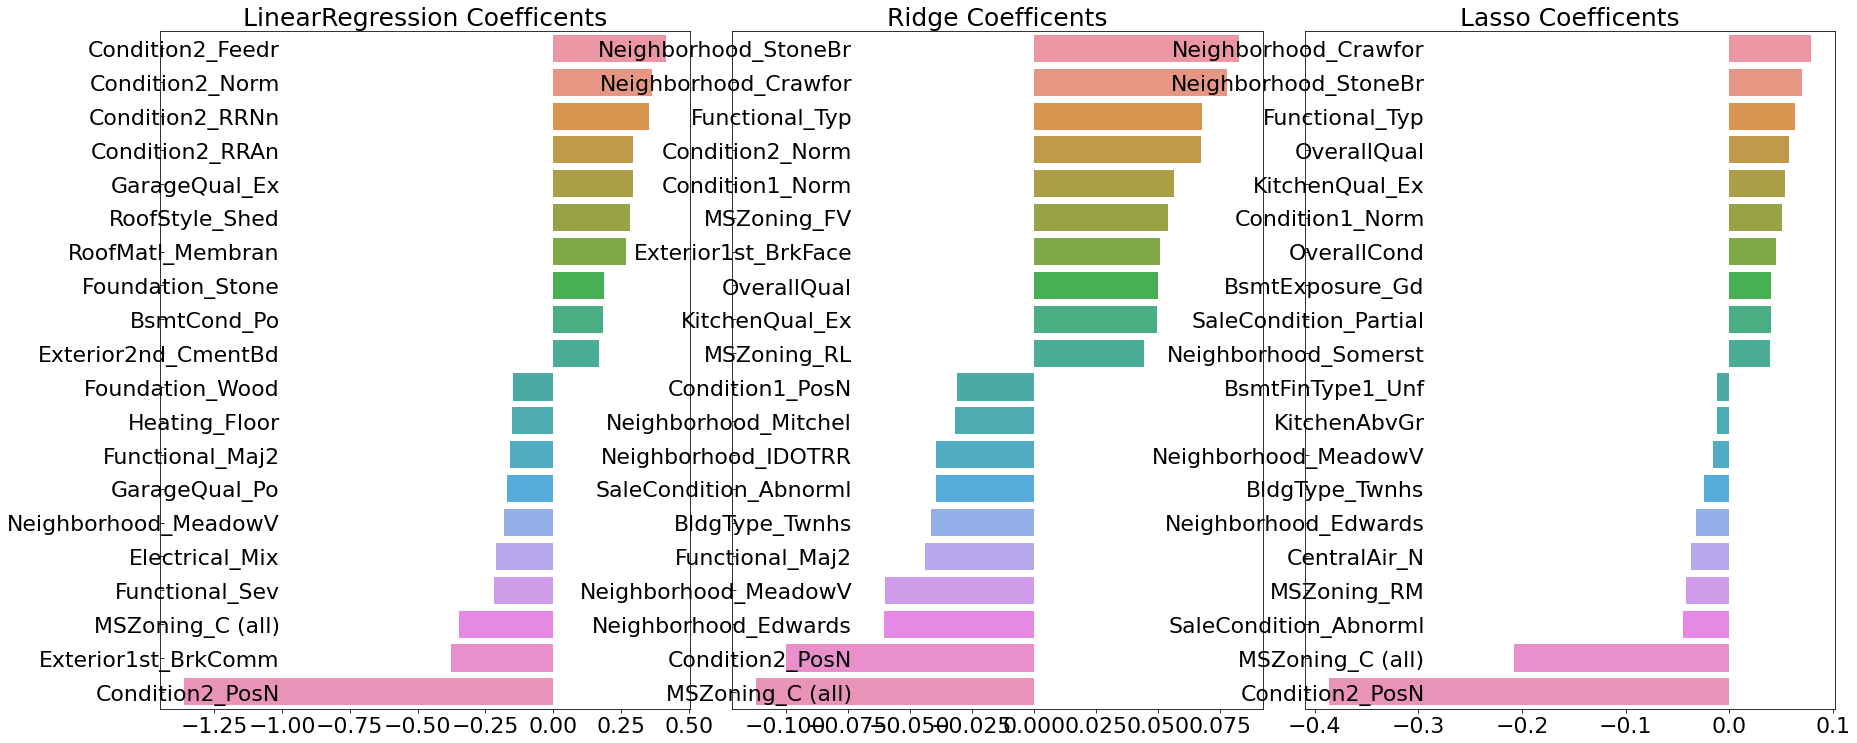

In [144]:
# gridsearchcv로 찾은 최적 alpha값으로 학습 데이터 학습, 테스트 데이터 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

rg_reg = Ridge(alpha = 12)
rg_reg.fit(X_train, y_train)

ls_reg = Lasso(alpha = 0.001)
ls_reg.fit(X_train, y_train)

# 모든 모델의 rmse 출력
models = [lr_reg, rg_reg, ls_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
visualize_coefficient(models)

- alpha값 최적화 후 테스트 데이터 세트의 예측 성능이 더 좋아짐
- 모델별 회귀 계수도 많이 달라짐
- 기존에는 라쏘모델의 회귀계수가 나머지 두개 모델과 많은 차이가 있었지만, 이번에 릿지, 라쏘모델에서 비슷한 피처의 회귀 계수가 높게 나타남
- 하지만 동일한 피처라도 회귀계수 값은 훨씬 작음

### 피처데이터 분포도 확인
- 피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있음
- 모든 숫자형 피처의 데이터 분포도를 확인해서 분포도가 어느정도로 왜곡되어있는지 확인 필요
- stats 모듈의 skew()함수는 데이터 세트의 왜곡정도를 추출해줌
    - 반환값이 1 이상인 경우, 왜곡정도가 높다고 판단
- 왜곡 정도가 높은 피처만 추출하여 로그변환 시킬 것
    - 다만, 원핫인코딩이 적용된 컬럼은 적용하지 않아야함. 케티고리 피처는 코드성 피처이므로, 인코딩 시 당연히 왜곡될 가능성이 높음

#### 과제 3: 데이터 왜곡 로그 변환 후 성능 평가
stats 모듈의 skew()함수를 이용해 컬럼의 데이터 세트의 왜곡 정도를 추출하여 1 이상인 경우 왜곡 정도가 높다고 판단

In [145]:
from scipy.stats import skew

# object가 아닌 숫자형 피처 칼럼의 index 객체 추출
feature_index = house_df.dtypes[house_df.dtypes != 'object'].index
feature_index

# house_df에 칼럼 index를 []로 입력하면 해당하는 컬럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features = house_df[feature_index].apply(lambda x: skew(x))

# skew(왜곡) 정도가 1 이상인 컬럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [146]:
# 왜곡 정도가 높은 피처들을 로그변환

house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [147]:
# 왜곡정도 재확인


from scipy.stats import skew

# object가 아닌 숫자형 피처 칼럼의 index 객체 추출
feature_index = house_df.dtypes[house_df.dtypes != 'object'].index
feature_index

# house_df에 칼럼 index를 []로 입력하면 해당하는 컬럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features = house_df[feature_index].apply(lambda x: skew(x))

# skew(왜곡) 정도가 1 이상인 컬럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


- 로그 변환 이후에도 해당 피처들은 왜곡 정도가 높게 나타남
- 더 이상 로그 변환을 하더라도 개선하기 어렵기 떄문에 그대로 유지함
- house_df의 피처 일부를 로그변환했기 떄문에 다시 원핫인코딩을 적용한 house_df_ohe를 만듦

In [148]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [149]:
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size = 0.2,
                                                    random_state = 156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 rmse출력
rg_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
ls_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(rg_reg, rg_params)
print_best_params(ls_reg, ls_params)

Ridge 5 CV시 최적 평균 RMSE 값: 0.128, 최적의 alpha값: {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE 값: 0.125, 최적의 alpha값: {'alpha': 0.001}


- 릿지의 경우 최적 하이퍼파라미터 알파값이 12->10으로 변함
- 두 모델 모두 피처 로그변환 이전과 비교했을 때, 평균 rmse값이 감소하며 성능이 향상됨을 알 수 있음
```
로그변환 이전 rmse값
Ridge 5 CV시 최적 평균 RMSE 값: 0.142, 최적의 alpha값: {'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE 값: 0.142, 최적의 alpha값: {'alpha': 0.001}
```

LinearRegression, 로그 변환된 RMSE(RMSLE): 0.128
Ridge, 로그 변환된 RMSE(RMSLE): 0.122
Lasso, 로그 변환된 RMSE(RMSLE): 0.119


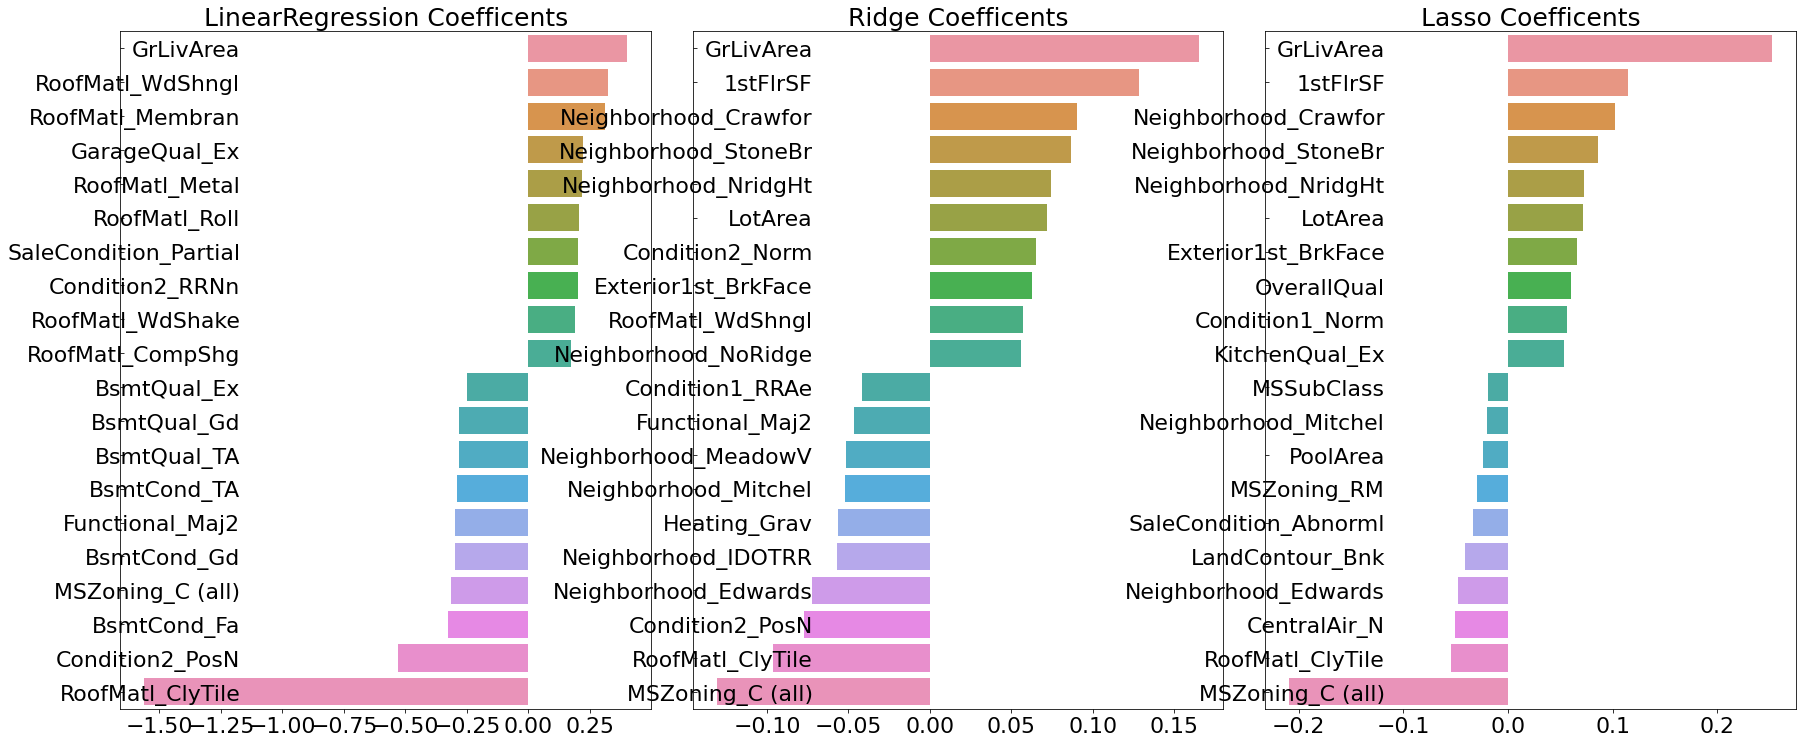

In [151]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

rg_reg = Ridge(alpha = 10)
rg_reg.fit(X_train, y_train)

ls_reg = Lasso(alpha = 0.001)
ls_reg.fit(X_train, y_train)


# 모든 모델의 rmse 출력
models = [lr_reg, rg_reg, ls_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
visualize_coefficient(models)

- 시각화 결과, 세 모델 모두 GrLivArea, 즉 주거공간 크기가 회귀 계수가 가장 높은 피처가 됨
- 주거 공간의 크기가 주택 가격에 미치는 영향이 당연히 제일 높을 것이라는 상식선 결과가 이제야 도출됨!ㅋ

### 이상치 데이터 처리

- 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터 처리가 중요함
- 먼저 세 개 모델 모두에서 가장 큰 회귀 꼐수를 가지는 GrLivArea 피처의 데이터 분포 살펴보기

#### 과제 4: 이상치 제거 후 성능 평가(lr, Ridge, Lasso)

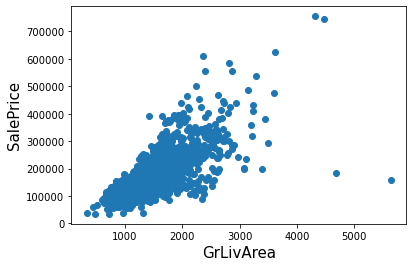

In [152]:
# 주택가격 원본 데이터인 house_df_org에서 GrLivArea와 타깃 값인 SalePrice 관계 시각화하기

plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])

plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)

plt.show()

- 일반적으로 주거 공간이 큰 집일수록 가격이 비싸기 때문에, GrLivArea 피처는 SalePrice와 양의 상관도가 매우 높음을 직관적으로 알 수 있음
- 하지만 오른편에 보이는 이상치는 주거공간이 큼에도 불구하고 가격이 낮아 피처와 타겟변수 간 관계에서 많이 어긋나 있음을 알 수 있음
- 따라서, 주거 공간이 4000평 이상인데도 가격이 500,000달러 이하인 데이터는 이상치로 간주하기로 함

In [155]:
# GridLivArea 와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성
# 원본데이터가 아닌 변환된 데이터에서 4000평 이상이고, 가격이 500,000달러 이하인 데이터 추출
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)

outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index:', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape: ', house_df_ohe.shape)

# 데이터프레임의 인덱스를 이용해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
print('이상치 삭제 후 house_df_ohe shape: ', house_df_ohe.shape)

이상치 레코드 index: [ 523 1298]
이상치 삭제 전 house_df_ohe shape:  (1460, 271)
이상치 삭제 후 house_df_ohe shape:  (1458, 271)


- 레코드의 인덱스 수가 2개가 삭제되어 1458개가 됨
- 이상치를 제거한 데이터셋을 가지고 릿지, 라쏘 모델의 최적화를 수행하고 결과 출력하기

In [156]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size = 0.2,
                                                    random_state = 156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 rmse출력
rg_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
ls_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(rg_reg, rg_params)
print_best_params(ls_reg, ls_params)

Ridge 5 CV시 최적 평균 RMSE 값: 0.113, 최적의 alpha값: {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값: 0.112, 최적의 alpha값: {'alpha': 0.001}


- 단 두개의 이상치 데이터만 제거했는데, 예측수치가 매우 크게 향상됨
```
이상치 제거전 rmse
Ridge 5 CV시 최적 평균 RMSE 값: 0.128, 최적의 alpha값: {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE 값: 0.125, 최적의 alpha값: {'alpha': 0.001}
```
- 릿지모델의 경우 최적 alpha값이 10->8로 변화, 평균rmse 값은 0.128 ->0.113으로 개선됨
- 라쏘모델의 경우 최적 alpha값은 그대로, 평균rmse값은 0.125 -> 0.112로 개선됨

LinearRegression, 로그 변환된 RMSE(RMSLE): 0.129
Ridge, 로그 변환된 RMSE(RMSLE): 0.103
Lasso, 로그 변환된 RMSE(RMSLE): 0.1


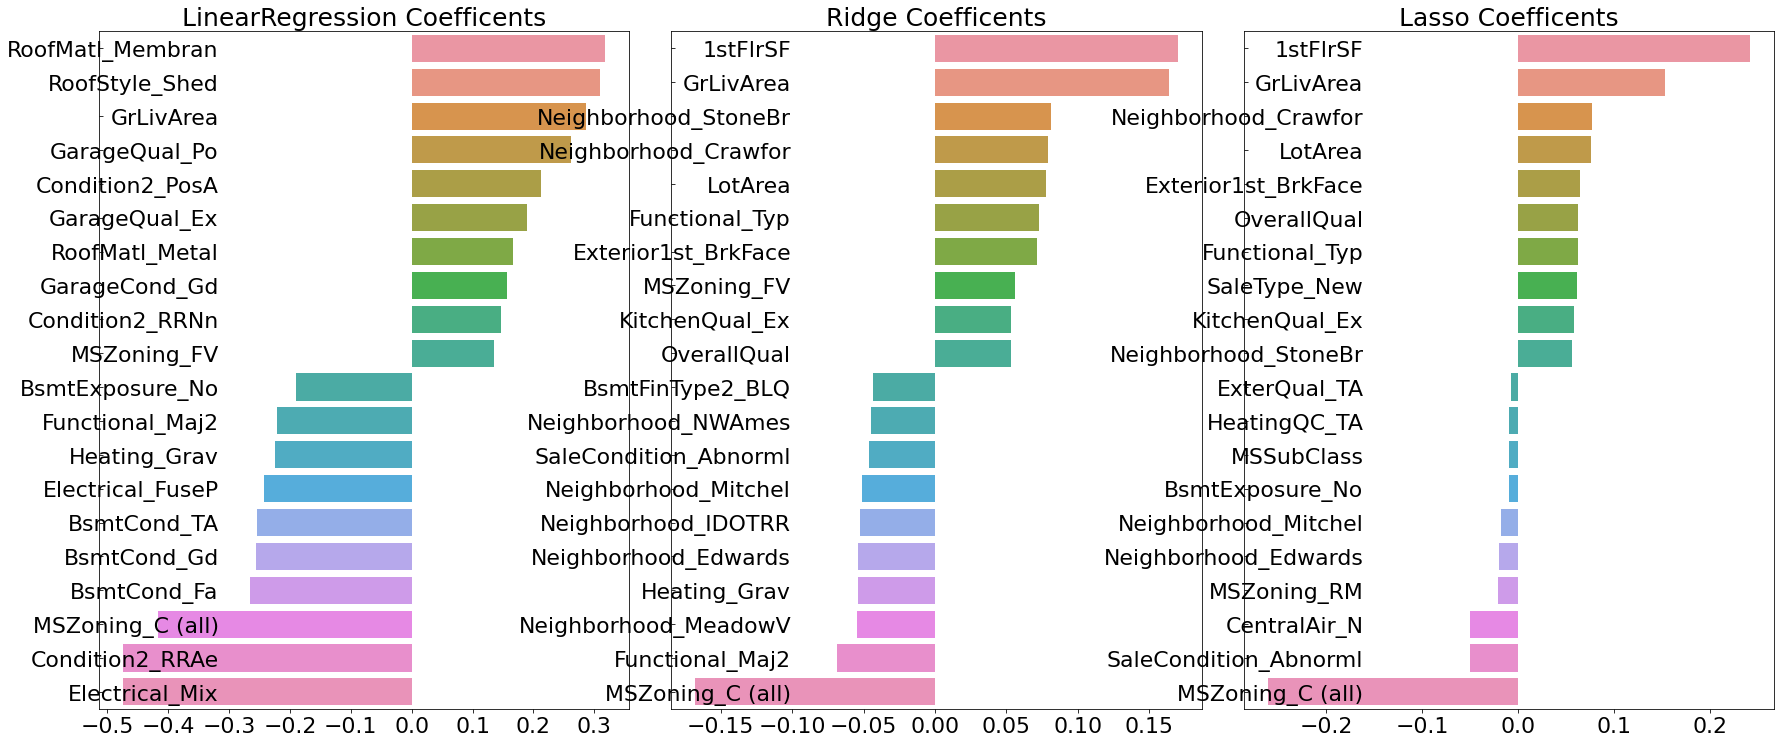

In [157]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

rg_reg = Ridge(alpha = 8)
rg_reg.fit(X_train, y_train)

ls_reg = Lasso(alpha = 0.001)
ls_reg.fit(X_train, y_train)


# 모든 모델의 rmse 출력
models = [lr_reg, rg_reg, ls_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
visualize_coefficient(models)

- 이상치가 제거된 데이터세트를 기반으로 rmse수치및 회귀계수 시각화한 결과